In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KK-Niraj/Hotel-Booking-Analysis/main/Hotel%20Bookings.csv')

In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.shape

(119390, 32)

In [5]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


## Handling Missing Values

In [6]:
missing_df = df.isnull().sum().to_frame().rename(columns={0: "Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"] / len(df)) * 100, 2)
missing_df

,Total No. of Missing Values,% of Missing Values
hotel,0,0.00
is_canceled,0,0.00
lead_time,0,0.00
arrival_date_year,0,0.00
arrival_date_month,0,0.00
arrival_date_week_number,0,0.00
arrival_date_day_of_month,0,0.00
stays_in_weekend_nights,0,0.00
stays_in_week_nights,0,0.00
adults,0,0.00


In [7]:
df['agent'].mode()

0    9.0
Name: agent, dtype: float64

In [8]:
df.drop(['company'], axis=1, inplace=True)
df['country'] = df['country'].fillna(df['country'].mode().index[0])
df['agent'].fillna(df['agent'].mode(), inplace=True)

/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_2312/3305713875.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(df['agent'].mode(), inplace=True)


In [11]:
# Drop the specified columns
columns_to_drop = ['name', 'email', 'phone-number', 'credit_card', 'reservation_status']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [12]:
df[df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,0,Transient,98.00,0,1,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,0,Transient,98.00,0,1,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,1,No Deposit,250.0,0,Transient,84.67,0,1,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,1,No Deposit,250.0,0,Transient,84.67,0,1,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,0,No Deposit,250.0,0,Transient,137.00,0,1,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,D,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,A,0,No Deposit,42.0,0,Transient,82.35,0,1,2017-09-04


In [13]:
df.duplicated().sum()

32003

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87387 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87387 non-null  object 
 1   is_canceled                     87387 non-null  int64  
 2   lead_time                       87387 non-null  int64  
 3   arrival_date_year               87387 non-null  int64  
 4   arrival_date_month              87387 non-null  object 
 5   arrival_date_week_number        87387 non-null  int64  
 6   arrival_date_day_of_month       87387 non-null  int64  
 7   stays_in_weekend_nights         87387 non-null  int64  
 8   stays_in_week_nights            87387 non-null  int64  
 9   adults                          87387 non-null  int64  
 10  children                        87383 non-null  float64
 11  babies                          87387 non-null  int64  
 12  meal                            8738

In [17]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date'],
      dtype='object')

### Analyzing is_cancelled

In [18]:
df['is_canceled'].value_counts()

is_canceled
0    63364
1    24023
Name: count, dtype: int64

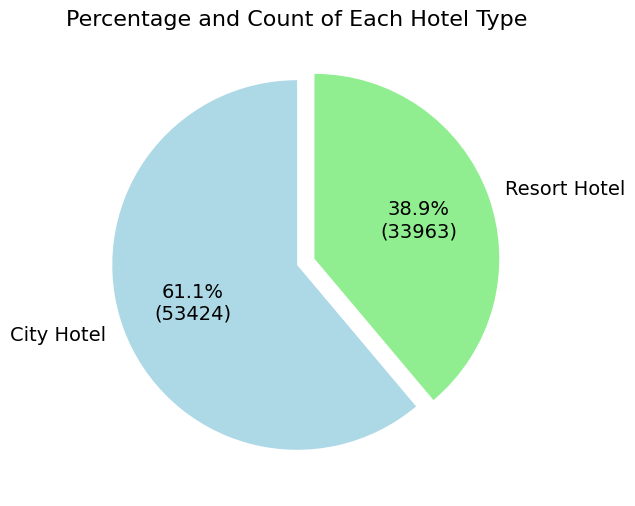

In [19]:

# Extracting labels and sizes from the DataFrame

labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()


# Function to display both percentage and actual number
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)

    return my_format


# Creating the pie chart
explode = (0, 0.1)
colors = ['lightblue', 'lightgreen']
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct_format(sizes), startangle=90, textprops={'fontsize': 14})
plt.title('Percentage and Count of Each Hotel Type', fontsize=16)
plt.show()

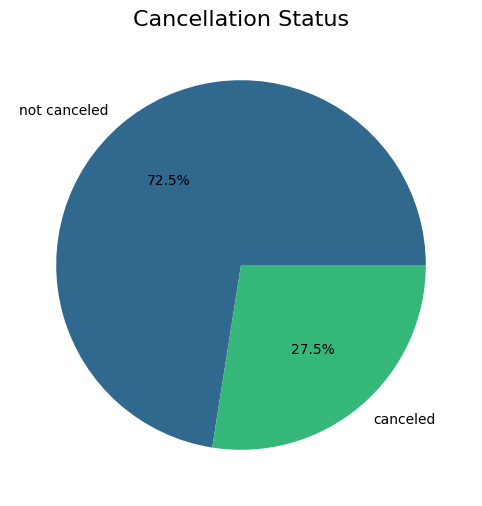

In [20]:
# Calculate the percentage distribution of 'Value Segment'
value_counts = df['is_canceled'].value_counts()
value_percentage = value_counts / value_counts.sum() * 100

# Replace 0 with 'No' and 1 with 'Yes'
value_percentage.index = value_percentage.index.map({0: 'not canceled', 1: 'canceled'})

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(value_percentage, labels=value_percentage.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(value_counts)))
plt.title('Cancellation Status', fontsize=16)
plt.show()


Majority of value segment belongs to "No Cancelled" means there business is positive due to less number of bookings being cancelled.

## Analyzing Hotel

In [21]:
# Calculate the counts and percentages
hotel_counts = df['hotel'].value_counts()
hotel_percentages = df['hotel'].value_counts(normalize=True) * 100

# Combine counts and percentages into a single DataFrame
hotel_summary = pd.DataFrame({'Count': hotel_counts, 'Percentage': hotel_percentages.round(2)})

# Display the result
print(hotel_summary)


              Count  Percentage
hotel                          
City Hotel    53424       61.13
Resort Hotel  33963       38.87


/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_2312/2675465768.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = cancellation_counts.sum(axis=1)[int(x + width / 2)]
/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_2312/2675465768.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = cancellation_counts.sum(axis=1)[int(x + width / 2)]
/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_2312/2675465768.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFr

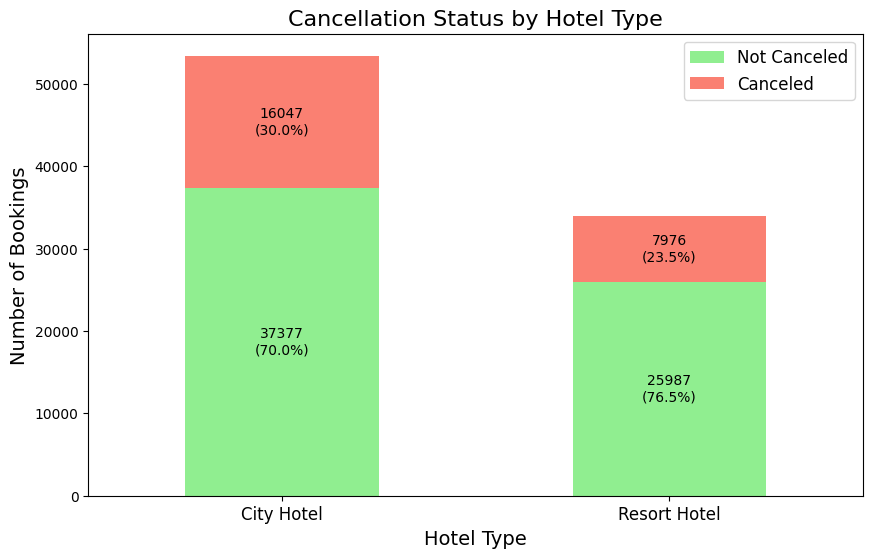

In [22]:
# Calculate the count of cancellations by hotel type
cancellation_counts = df.groupby(['hotel', 'is_canceled']).size().unstack()

# Calculate the percentage for each category within each hotel type
cancellation_counts_percentage = (cancellation_counts.T / cancellation_counts.sum(axis=1)).T * 100

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

cancellation_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], ax=ax)

# Adding data labels
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()

    if height > 0:
        total = cancellation_counts.sum(axis=1)[int(x + width / 2)]
        percentage = (height / total) * 100
        label_text = f'{int(height)}\n({percentage:.1f}%)'
        ax.text(x + width / 2, y + height / 2, label_text, ha='center', va='center', fontsize=10, color='black')

# Customizing the plot
ax.set_title('Cancellation Status by Hotel Type', fontsize=16)
ax.set_xlabel('Hotel Type', fontsize=14)
ax.set_ylabel('Number of Bookings', fontsize=14)
ax.set_xticklabels(cancellation_counts.index, rotation=0, fontsize=12)
ax.legend(['Not Canceled', 'Canceled'], fontsize=12)

plt.show()


Resort type booking are less and there cancellation percentage is high  wherase city hote type booking are booked more and still canceled less

### Lead Time 

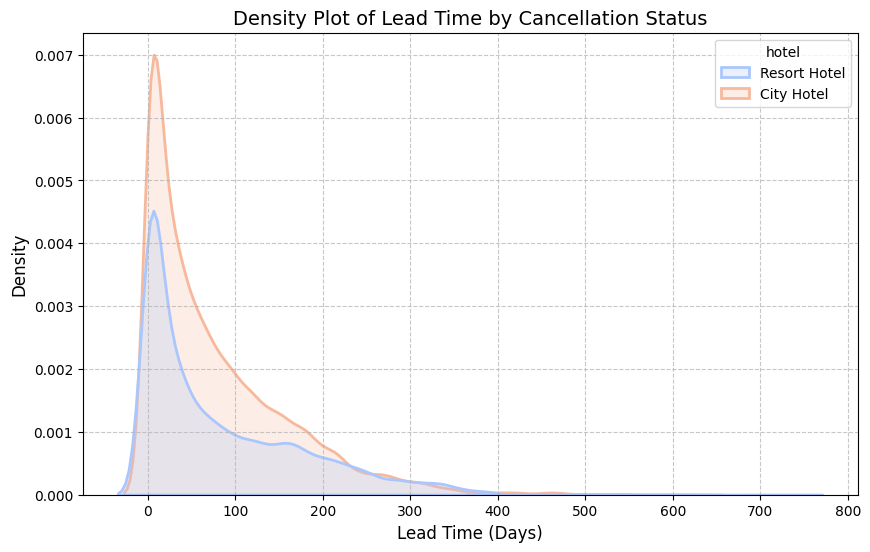

In [23]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create the KDE plot with additional enhancements and hue parameter
sns.kdeplot(data=df, x='lead_time', hue='hotel', fill=True, palette='coolwarm', linewidth=2)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set labels and title with more descriptive text
plt.xlabel('Lead Time (Days)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Density Plot of Lead Time by Cancellation Status', fontsize=14)

# Show the plot
plt.show()

### Arrival Date Year

<Axes: xlabel='arrival_date_year', ylabel='count'>

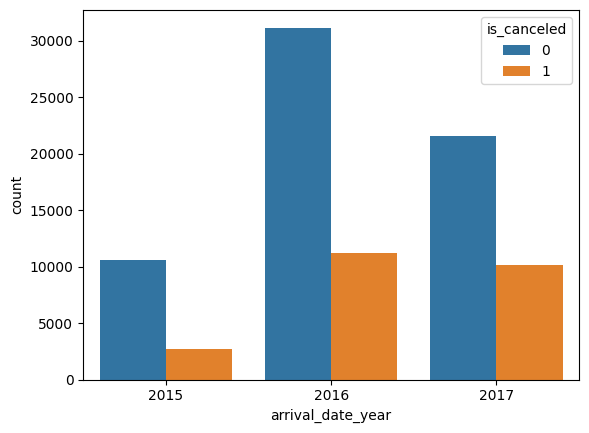

In [24]:
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

Maximum Bookings where dones in year 2016. Data is till september so cannot comment on trend perfectly and year 2017

### Arrive Date Month

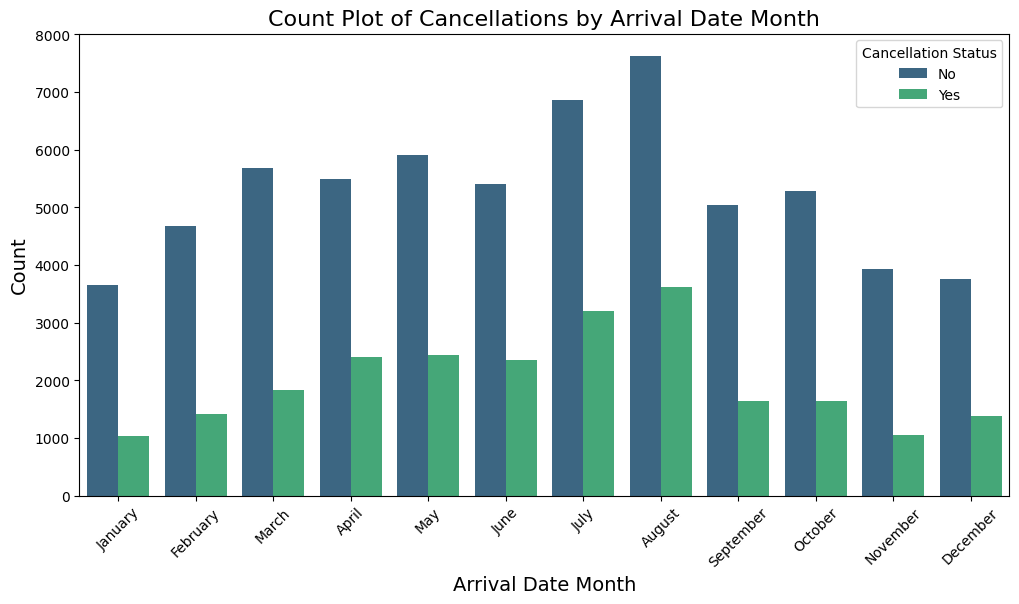

In [25]:
# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot the count plot with the specified order
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', order=month_order, palette='viridis')
plt.title('Count Plot of Cancellations by Arrival Date Month', fontsize=16)
plt.xlabel('Arrival Date Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cancellation Status', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.show()


August is the time when majority of the bookings are done

This show peak booking happends in month of 32 and 33 whose month is august

### Creating a new feature as category stay

In [26]:
# Create the categorical feature
def categorize_stay(row):
    if row['stays_in_weekend_nights'] > 0 and row['stays_in_week_nights'] == 0:
        return 'stays_in_weekend_nights'
    elif row['stays_in_weekend_nights'] == 0 and row['stays_in_week_nights'] > 0:
        return 'stays_in_week_nights'
    elif row['stays_in_weekend_nights'] > 0 and row['stays_in_week_nights'] > 0:
        return 'stays_in_both_weekday_weekends'
    else:
        return 'no_stays'


# Apply the function to create the new categorical column
df['stay_category'] = df.apply(categorize_stay, axis=1)

In [27]:
df['stay_category'].value_counts()

stay_category
stays_in_both_weekday_weekends    46720
stays_in_week_nights              34495
stays_in_weekend_nights            5521
no_stays                            651
Name: count, dtype: int64

<Figure size 1400x800 with 0 Axes>

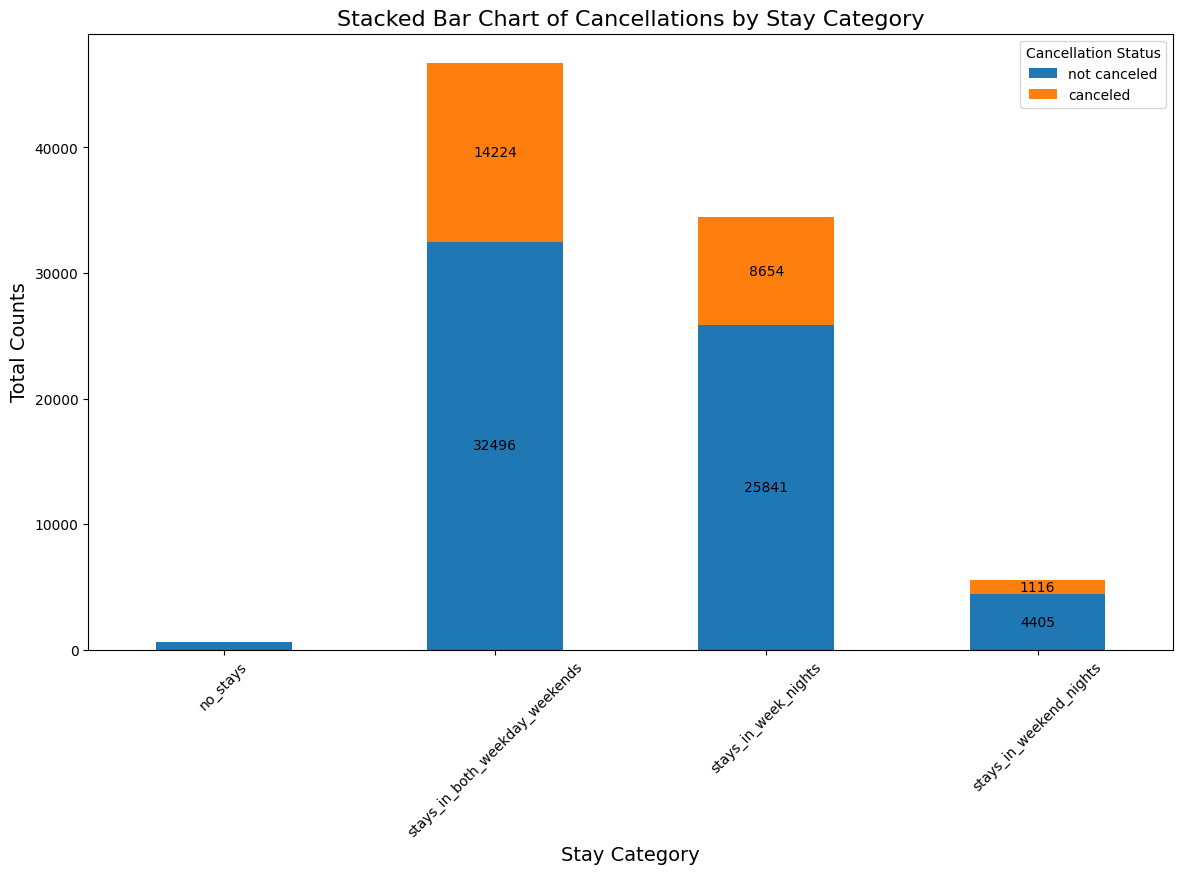

In [28]:

# Apply the function to create the new categorical column
df['stay_category'] = df.apply(categorize_stay, axis=1)

# Create a crosstab for stay_category and is_canceled
crosstab = pd.crosstab(df['stay_category'], df['is_canceled'])

# Replace 0 with 'not canceled' and 1 with 'canceled'
crosstab.columns = crosstab.columns.map({0: 'not canceled', 1: 'canceled'})

# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Plot the stacked bar chart with the specified order and enhancements
ax = crosstab.plot(kind='bar', stacked=True, figsize=(14, 8))

# Set title and labels with more descriptive text
plt.title('Stacked Bar Chart of Cancellations by Stay Category', fontsize=16)
plt.xlabel('Stay Category', fontsize=14)
plt.ylabel('Total Counts', fontsize=14)

# Customize the legend
plt.legend(title='Cancellation Status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Annotate each segment with its count
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    # Check if the category is not "no_stays" by getting the x position and matching it to "no_stays"
    if crosstab.index[int(x + width / 2)] != 'no_stays':
        ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

# Show the plot
plt.show()

Majority of bookings getting cancelled belong to the category of staying on both weekday and week

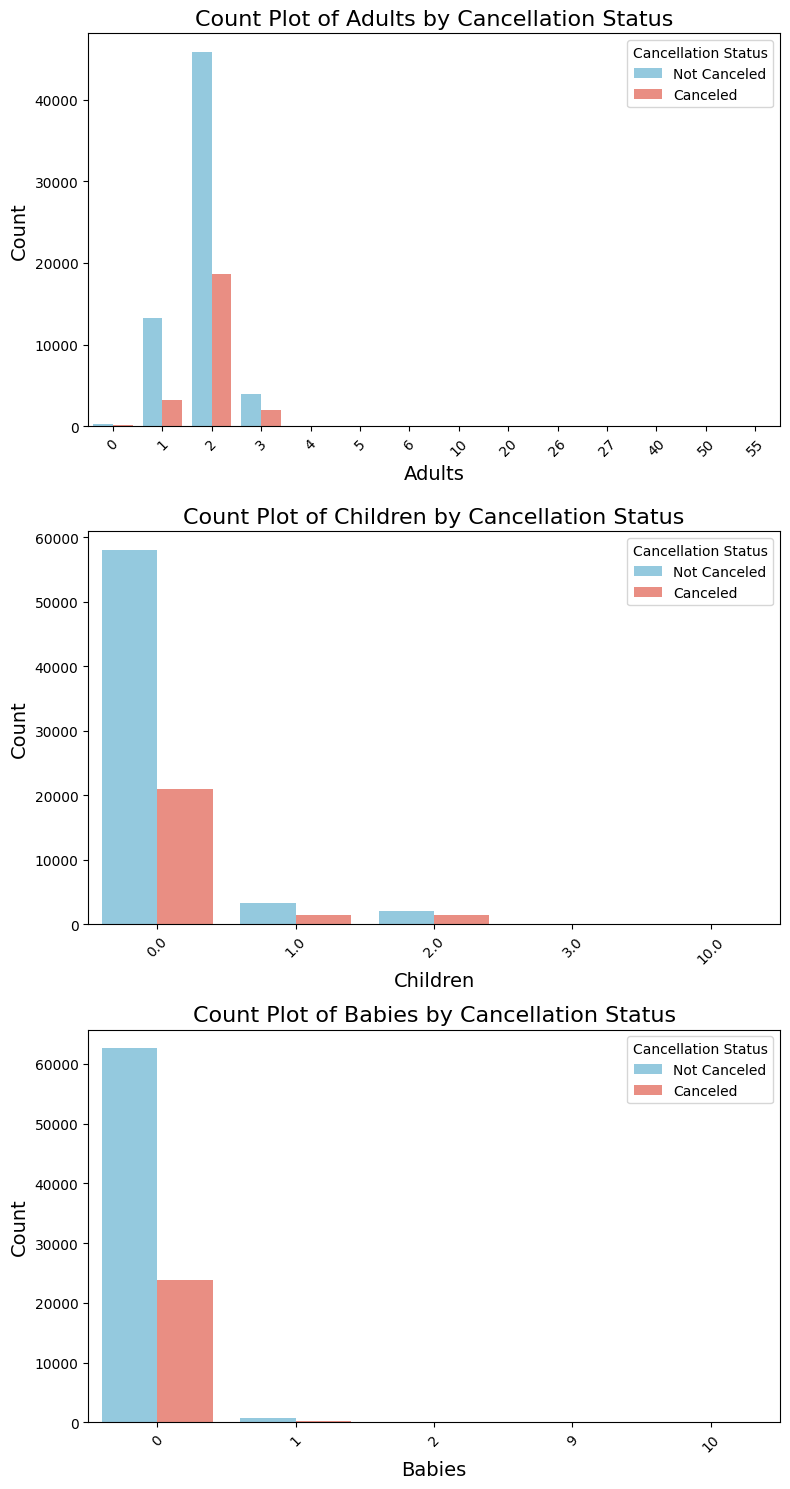

In [29]:
# List of columns to plot
columns_to_plot = ['adults', 'children', 'babies']

# Set the figure size for the plots (reduced size)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

# Define the color palette
palette = ['skyblue', 'salmon']

# Loop through each column and create a count plot
for idx, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, hue='is_canceled', palette=palette, ax=axes[idx])
    axes[idx].set_title(f'Count Plot of {column.capitalize()} by Cancellation Status', fontsize=16)
    axes[idx].set_xlabel(column.capitalize(), fontsize=14)
    axes[idx].set_ylabel('Count', fontsize=14)
    axes[idx].legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
    axes[idx].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

Children and Babies share the similar pattern so there values can be clubbed by created a column of all children

### Creating all children feature

In [30]:
df['all_children'] = df['children'] + df['babies']

### Creating Continent as a feature

In [31]:
# Mapping of country codes to continents
continent_mapping = {
    'PRT': 'Europe', 'GBR': 'Europe', 'USA': 'North America', 'ESP': 'Europe', 'IRL': 'Europe',
    'FRA': 'Europe', 'ROU': 'Europe', 'NOR': 'Europe', 'OMN': 'Asia', 'ARG': 'South America',
    'POL': 'Europe', 'DEU': 'Europe', 'BEL': 'Europe', 'CHE': 'Europe', 'CN': 'Asia',
    'GRC': 'Europe', 'ITA': 'Europe', 'NLD': 'Europe', 'DNK': 'Europe', 'RUS': 'Europe',
    'SWE': 'Europe', 'AUS': 'Oceania', 'EST': 'Europe', 'CZE': 'Europe', 'BRA': 'South America',
    'FIN': 'Europe', 'MOZ': 'Africa', 'BWA': 'Africa', 'LUX': 'Europe', 'SVN': 'Europe',
    'ALB': 'Europe', 'IND': 'Asia', 'CHN': 'Asia', 'MEX': 'North America', 'MAR': 'Africa',
    'UKR': 'Europe', 'SMR': 'Europe', 'LVA': 'Europe', 'PRI': 'North America', 'SRB': 'Europe',
    'CHL': 'South America', 'AUT': 'Europe', 'BLR': 'Europe', 'LTU': 'Europe', 'TUR': 'Europe',
    'ZAF': 'Africa', 'AGO': 'Africa', 'ISR': 'Asia', 'CYM': 'North America', 'ZMB': 'Africa',
    'CPV': 'Africa', 'ZWE': 'Africa', 'DZA': 'Africa', 'KOR': 'Asia', 'CRI': 'North America',
    'HUN': 'Europe', 'ARE': 'Asia', 'TUN': 'Africa', 'JAM': 'North America', 'HRV': 'Europe',
    'HKG': 'Asia', 'IRN': 'Asia', 'GEO': 'Asia', 'AND': 'Europe', 'GIB': 'Europe', 'URY': 'South America',
    'JEY': 'Europe', 'CAF': 'Africa', 'CYP': 'Asia', 'COL': 'South America', 'GGY': 'Europe',
    'KWT': 'Asia', 'NGA': 'Africa', 'MDV': 'Asia', 'VEN': 'South America', 'SVK': 'Europe',
    'FJI': 'Oceania', 'KAZ': 'Asia', 'PAK': 'Asia', 'IDN': 'Asia', 'LBN': 'Asia', 'PHL': 'Asia',
    'SEN': 'Africa', 'SYC': 'Africa', 'AZE': 'Asia', 'BHR': 'Asia', 'NZL': 'Oceania', 'THA': 'Asia',
    'DOM': 'North America', 'MKD': 'Europe', 'MYS': 'Asia', 'ARM': 'Asia', 'JPN': 'Asia',
    'LKA': 'Asia', 'CUB': 'North America', 'CMR': 'Africa', 'BIH': 'Europe', 'MUS': 'Africa',
    'COM': 'Africa', 'SUR': 'South America', 'UGA': 'Africa', 'BGR': 'Europe', 'CIV': 'Africa',
    'JOR': 'Asia', 'SYR': 'Asia', 'SGP': 'Asia', 'BDI': 'Africa', 'SAU': 'Asia', 'VNM': 'Asia',
    'PLW': 'Oceania', 'QAT': 'Asia', 'EGY': 'Africa', 'PER': 'South America', 'MLT': 'Europe',
    'MWI': 'Africa', 'ECU': 'South America', 'MDG': 'Africa', 'ISL': 'Europe', 'UZB': 'Asia',
    'NPL': 'Asia', 'BHS': 'North America', 'MAC': 'Asia', 'TGO': 'Africa', 'TWN': 'Asia',
    'DJI': 'Africa', 'STP': 'Africa', 'KNA': 'North America', 'ETH': 'Africa', 'IRQ': 'Asia',
    'HND': 'North America', 'RWA': 'Africa', 'KHM': 'Asia', 'MCO': 'Europe', 'BGD': 'Asia',
    'IMN': 'Europe', 'TJK': 'Asia', 'NIC': 'North America', 'BEN': 'Africa', 'VGB': 'North America',
    'TZA': 'Africa', 'GAB': 'Africa', 'GHA': 'Africa', 'TMP': 'Asia', 'GLP': 'North America',
    'KEN': 'Africa', 'LIE': 'Europe', 'GNB': 'Africa', 'MNE': 'Europe', 'UMI': 'Oceania',
    'MYT': 'Africa', 'FRO': 'Europe', 'MMR': 'Asia', 'PAN': 'North America', 'BFA': 'Africa',
    'LBY': 'Africa', 'MLI': 'Africa', 'NAM': 'Africa', 'BOL': 'South America', 'PRY': 'South America',
    'BRB': 'North America', 'ABW': 'North America', 'AIA': 'North America', 'SLV': 'North America',
    'DMA': 'North America', 'PYF': 'Oceania', 'GUY': 'South America', 'LCA': 'North America',
    'ATA': 'Antarctica', 'GTM': 'North America', 'ASM': 'Oceania', 'MRT': 'Africa', 'NCL': 'Oceania',
    'KIR': 'Oceania', 'SDN': 'Africa', 'ATF': 'Antarctica', 'SLE': 'Africa', 'LAO': 'Asia'
}

# Add continent column based on mapping
df['continent'] = df['country'].map(continent_mapping)


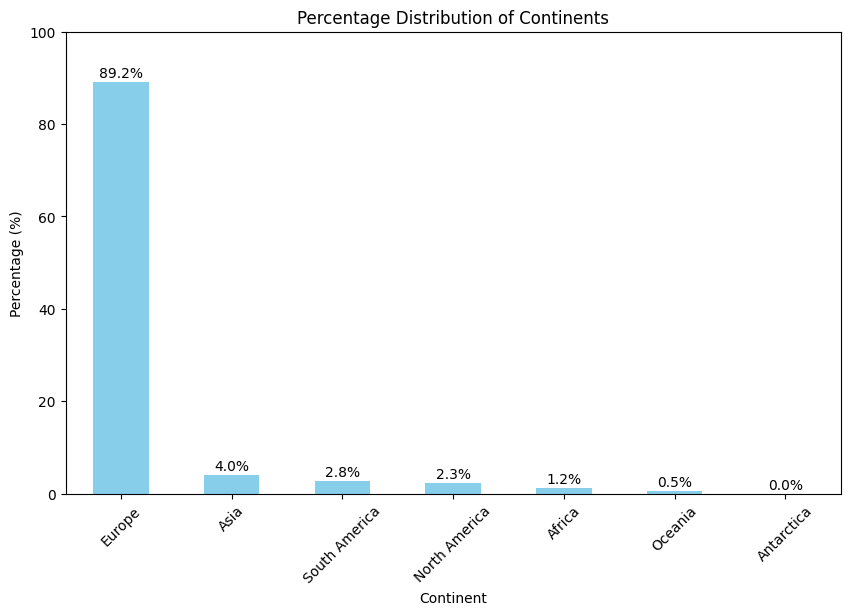

In [32]:

# Calculate value counts and percentages
value_counts = df['continent'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Plot
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Continents')
plt.xlabel('Continent')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)

# Add percentage labels on top of bars
for index, value in enumerate(percentages):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')

plt.show()

Majority of hotels are booked from Europe

In [33]:
#top 5 countries code from chatgpt
#europe's top 5 countries from chatgpt. Keep best interpretation

### Exploring Repeated Guests

/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_2312/3134110383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_repeated_guest', data=df, palette='viridis')


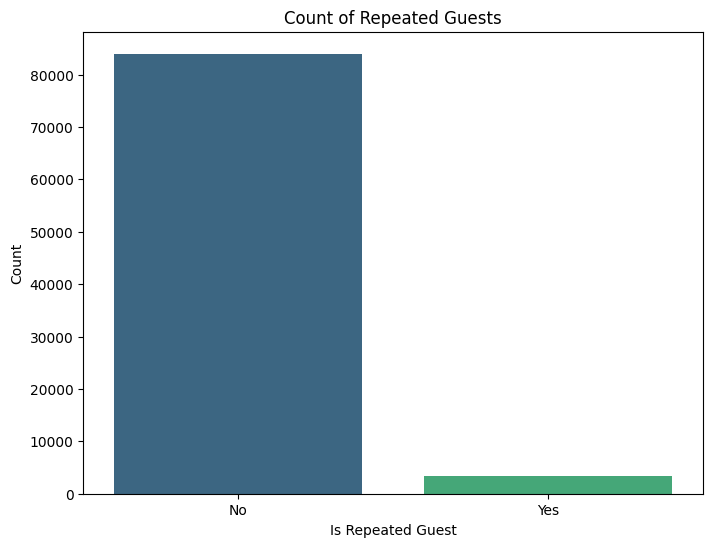

In [34]:
# Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='is_repeated_guest', data=df, palette='viridis')
plt.title('Count of Repeated Guests')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [35]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'stay_category', 'all_children',
       'continent'],
      dtype='object')

### Explorating meal type 

In [36]:
# Calculate value counts and percentages
value_counts = df['meal'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Combine counts and percentages into a single DataFrame
result_df = pd.DataFrame({
    'Count': value_counts,
    'Percentage (%)': percentages
})

# Display the DataFrame
print(result_df)

           Count  Percentage (%)
meal                            
BB         67969       77.779304
SC          9481       10.849440
HB          9085       10.396283
Undefined    492        0.563013
FB           360        0.411961


<Figure size 1400x800 with 0 Axes>

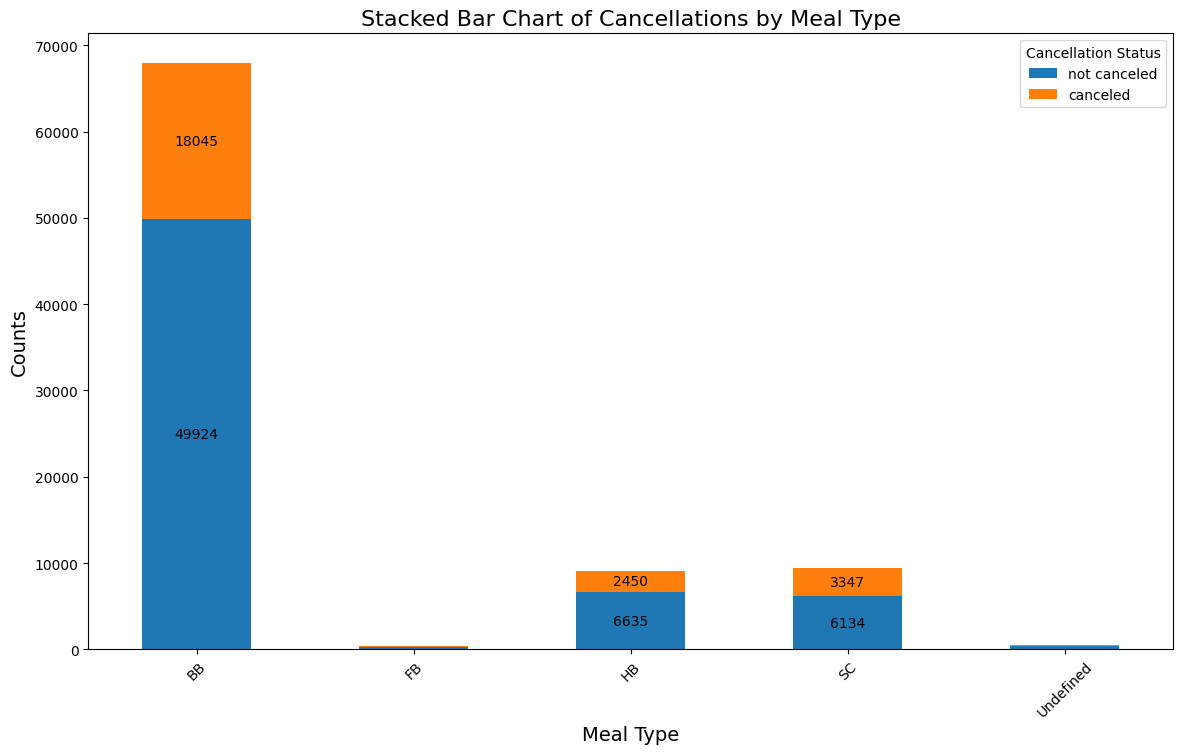

In [37]:
# Create a crosstab for meal and is_canceled without normalization
crosstab = pd.crosstab(df['meal'], df['is_canceled'])

# Replace 0 with 'not canceled' and 1 with 'canceled'
crosstab.columns = crosstab.columns.map({0: 'not canceled', 1: 'canceled'})

# Set the figure size for better readability
plt.figure(figsize=(14, 8))

# Plot the stacked bar chart with the specified order and enhancements
ax = crosstab.plot(kind='bar', stacked=True, figsize=(14, 8))

# Set title and labels with more descriptive text
plt.title('Stacked Bar Chart of Cancellations by Meal Type', fontsize=16)
plt.xlabel('Meal Type', fontsize=14)
plt.ylabel('Counts', fontsize=14)

# Customize the legend
plt.legend(title='Cancellation Status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    meal_type = crosstab.index[int(x + width / 2)]
    if meal_type not in ['FB', 'Undefined', 'undefined']:  # Skip annotation for the "FB" and "Undefined" categories
        ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=10, color='black')

# Show the plot
plt.show()

In [38]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'stay_category', 'all_children',
       'continent'],
      dtype='object')

In [39]:
# Creating a new DataFrame that only includes rows where is_canceled == 1
canceled_df = df[df['is_canceled'] == 1].copy()

### Creating Room Type Match Feature

In [40]:
canceled_df['room_type_match'] = (canceled_df['reserved_room_type'] == canceled_df['assigned_room_type']).astype(int)
df['room_type_match'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)


/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_2312/790269544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type_match', data=canceled_df, palette='viridis')


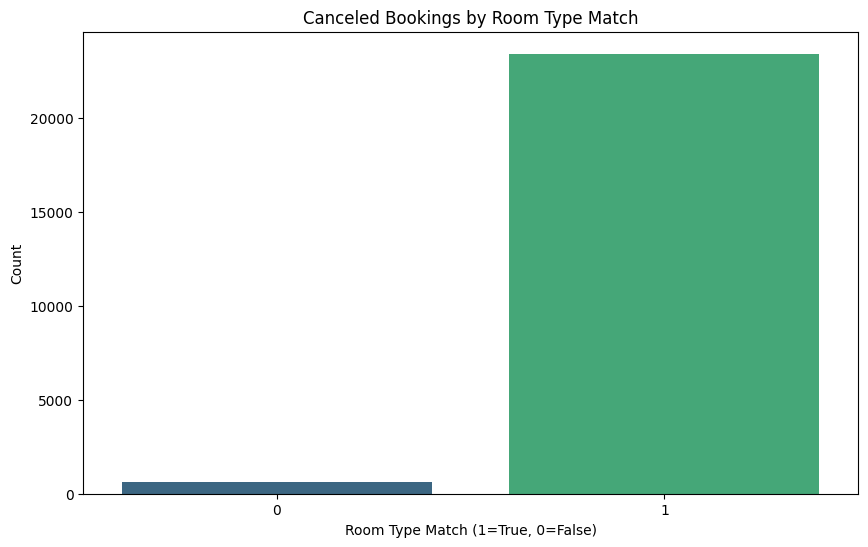

In [41]:

#change X axis bar bales to Room Type Match and Room Type Not Matched

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type_match', data=canceled_df, palette='viridis')

# Add labels and title
plt.xlabel('Room Type Match (1=True, 0=False)')
plt.ylabel('Count')
plt.title('Canceled Bookings by Room Type Match')

# Show the plot
plt.show()

Room type match does have correlation with tickect cancelling

### Deposite Type

In [42]:
# Calculate value counts as percentages
deposit_type_percentages = canceled_df['deposit_type'].value_counts(normalize=True) * 100

# Display the result
print(deposit_type_percentages)

deposit_type
No Deposit    95.799858
Non Refund     4.091912
Refundable     0.108230
Name: proportion, dtype: float64


/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_2312/3005126373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deposit_type', data=canceled_df, palette='viridis')


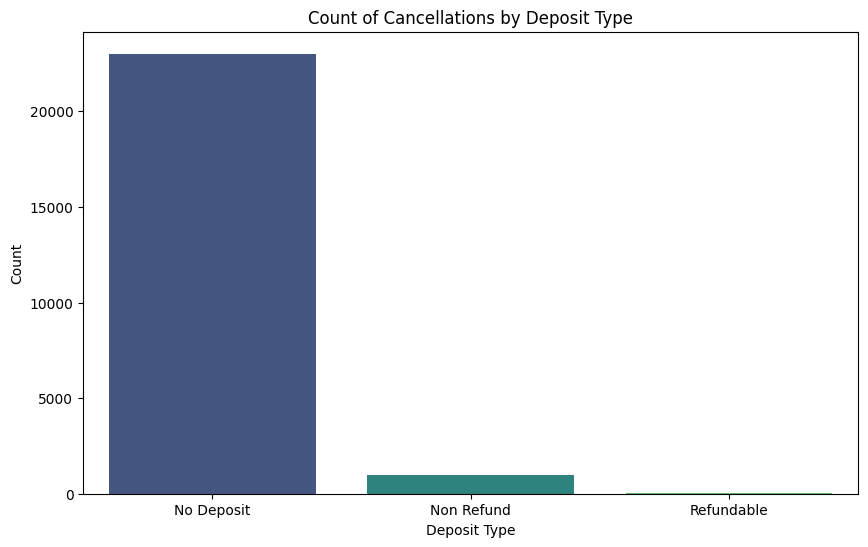

In [43]:
# Count of cancellations by deposit type
plt.figure(figsize=(10, 6))
sns.countplot(x='deposit_type', data=canceled_df, palette='viridis')

# Add labels and title
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.title('Count of Cancellations by Deposit Type')

# Show the plot
plt.show()

Majority of people who have not deposited tends to cancel their ticket a lot

/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_2312/2293710675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deposit_type', data=canceled_df, palette='viridis')


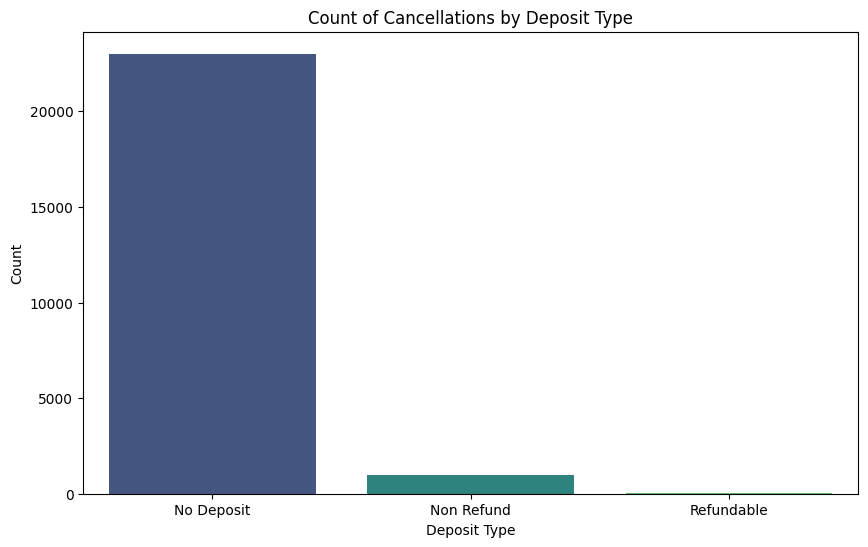

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='deposit_type', data=canceled_df, palette='viridis')

# Add labels and title
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.title('Count of Cancellations by Deposit Type')

# Show the plot
plt.show()

In [45]:
# Calculate value counts as percentages
deposit_type_percentages = df['customer_type'].value_counts(normalize=True) * 100

# Display the result
print(deposit_type_percentages)

customer_type
Transient          82.371520
Transient-Party    13.413895
Contract            3.592067
Group               0.622518
Name: proportion, dtype: float64


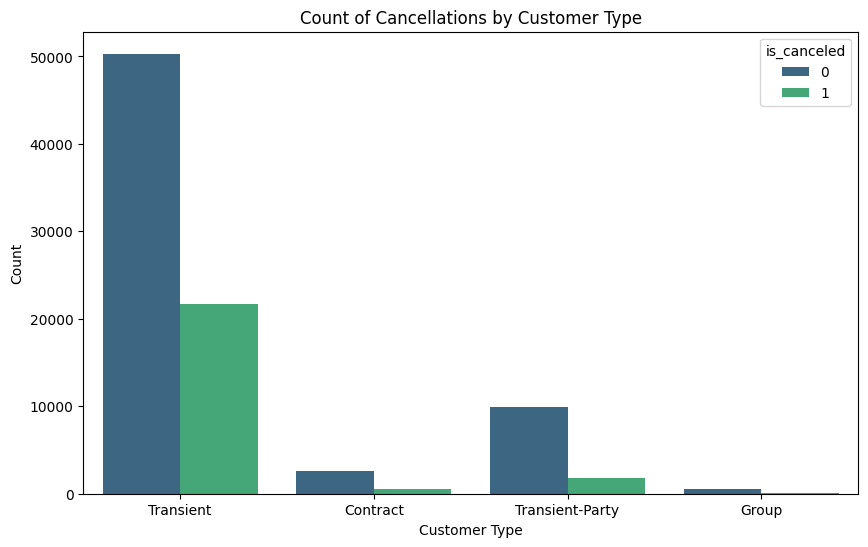

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Count of Cancellations by Customer Type')

# Show the plot
plt.show()

No relation with is canceled ticket

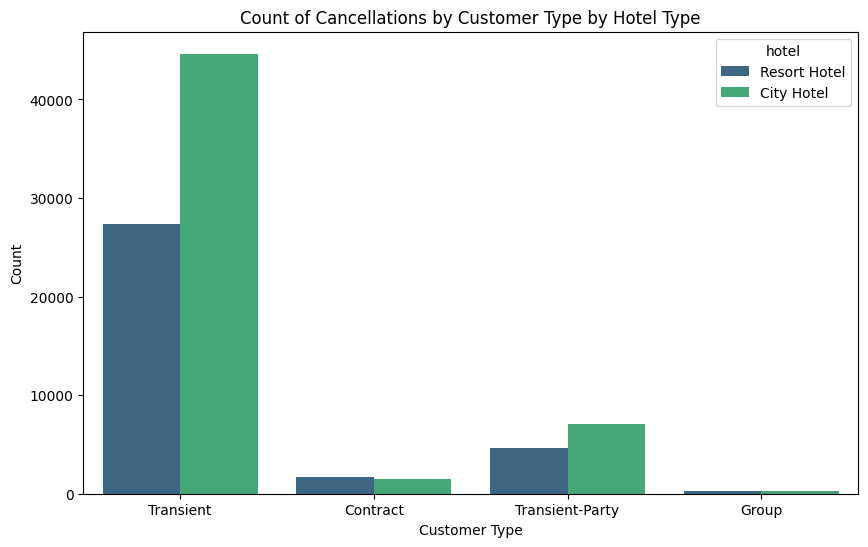

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_type', hue='hotel', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Count of Cancellations by Customer Type by Hotel Type')

# Show the plot
plt.show()

### Explore Special Requests with Canceled Bookings

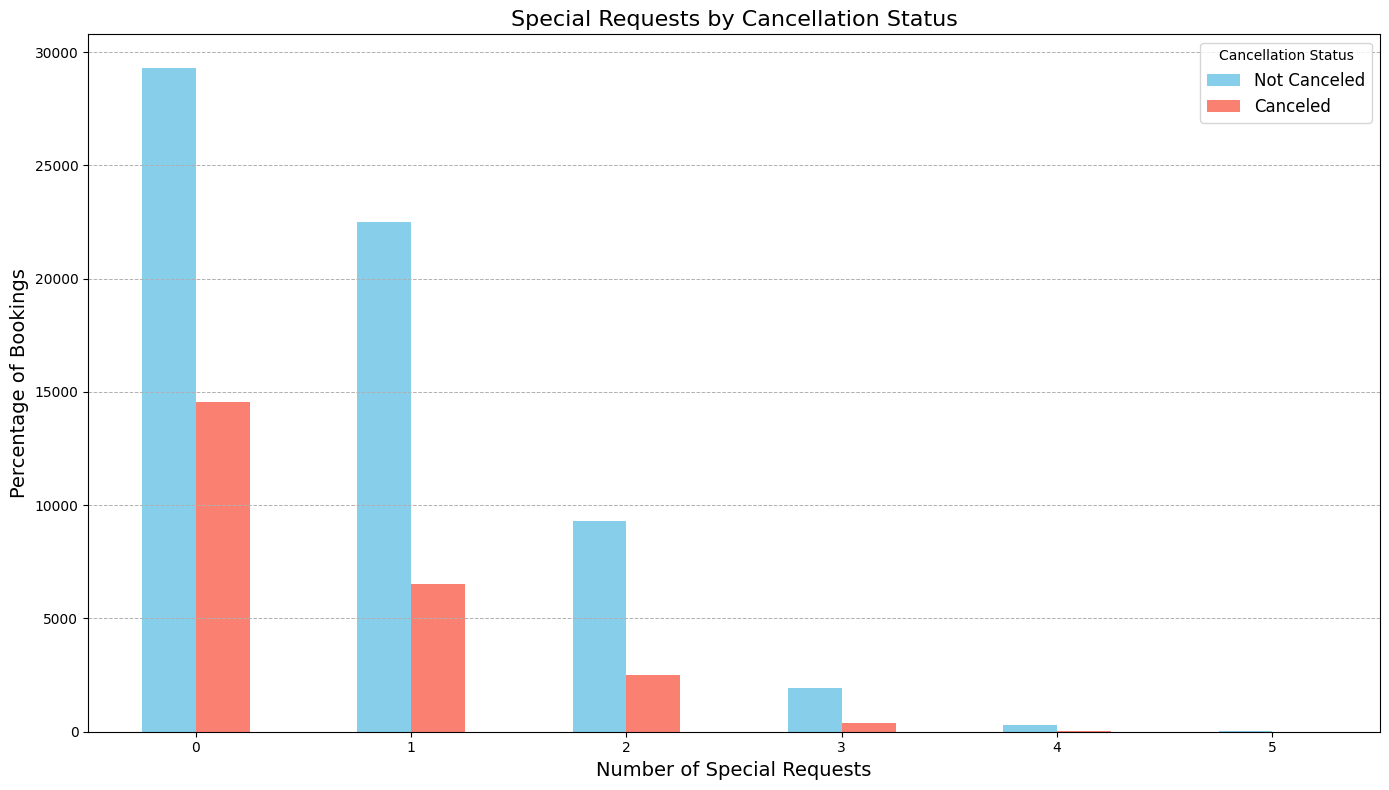

In [48]:
# Calculate the counts of total_of_special_requests by is_canceled
special_requests_cancellation = df.groupby(['total_of_special_requests', 'is_canceled']).size().unstack().fillna(0)

# Plotting the clustered bar chart 
fig, ax = plt.subplots(figsize=(14, 8))

special_requests_cancellation.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], ax=ax)

# Customizing the plot
ax.set_title('Special Requests by Cancellation Status', fontsize=16)
ax.set_xlabel('Number of Special Requests', fontsize=14)
ax.set_ylabel('Percentage of Bookings', fontsize=14)
ax.set_xticklabels(special_requests_cancellation.index, rotation=0)
ax.legend(['Not Canceled', 'Canceled'], title='Cancellation Status', fontsize=12)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

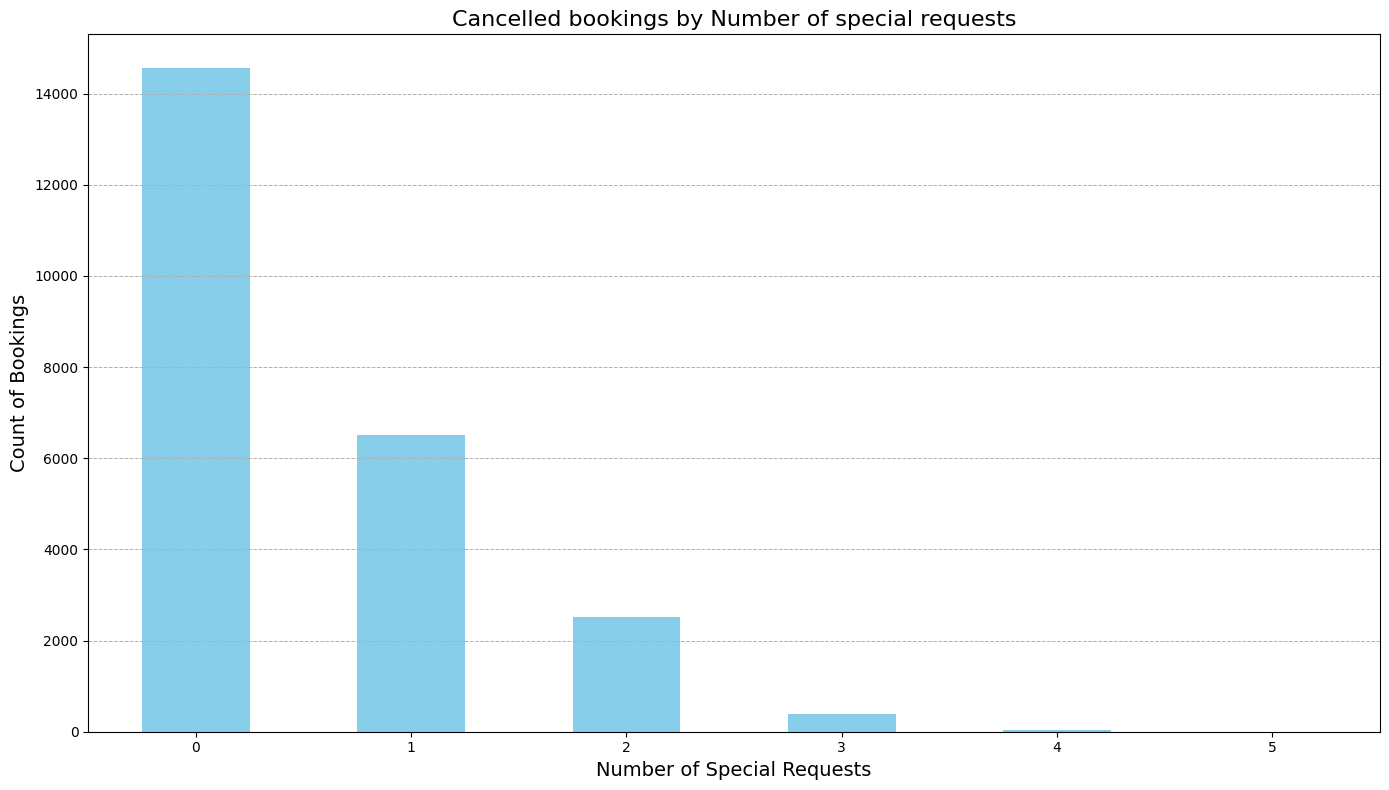

In [49]:
# Calculate the counts of total_of_special_requests by is_canceled
special_requests_cancellation = canceled_df.groupby(['total_of_special_requests']).size().fillna(0)

# Plotting the bar chart 
fig, ax = plt.subplots(figsize=(14, 8))

special_requests_cancellation.plot(kind='bar', stacked=False, color=['skyblue'], ax=ax)

# Customizing the plot
ax.set_title('Cancelled bookings by Number of special requests', fontsize=16)
ax.set_xlabel('Number of Special Requests', fontsize=14)
ax.set_ylabel('Count of Bookings', fontsize=14)
ax.set_xticklabels(special_requests_cancellation.index, rotation=0)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

Both canceled and non-canceled bookings reduce with number of requests indicating majority of guests have upto 2 special requests.

### Explore Meal Feature

In [50]:
df['meal'].value_counts()

meal
BB           67969
SC            9481
HB            9085
Undefined      492
FB             360
Name: count, dtype: int64

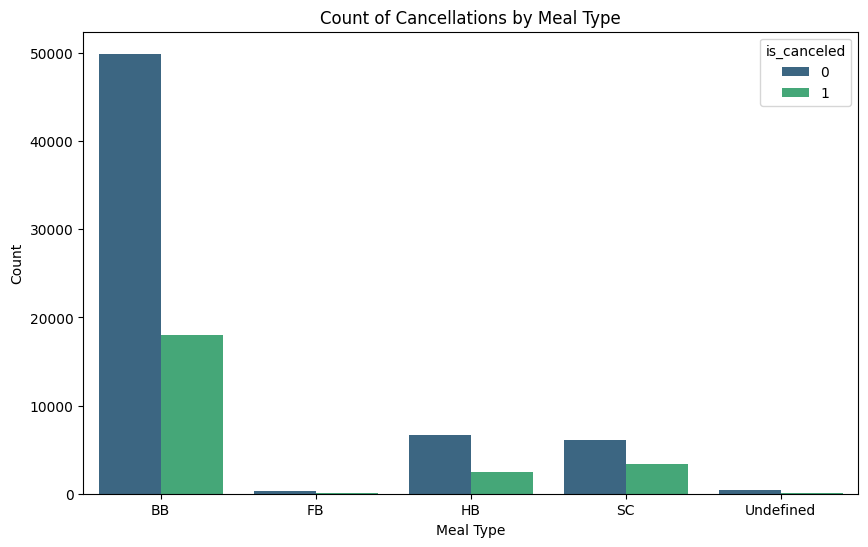

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='meal', hue='is_canceled', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title('Count of Cancellations by Meal Type')

# Show the plot
plt.show()

### Cancelling Ratio

In [52]:
# Create a new column that sums previous_cancellations and previous_bookings_not_canceled
# df['cancellation_ratio'] = df['previous_cancellations'] / (df['previous_cancellations'] + df['previous_bookings_not_canceled'])
df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']
df['cancellation_ratio'] = np.where(
    (df['previous_cancellations'] + df['previous_bookings_not_canceled']) != 0,
    df['previous_cancellations'] / (df['previous_cancellations'] + df['previous_bookings_not_canceled']), 0)

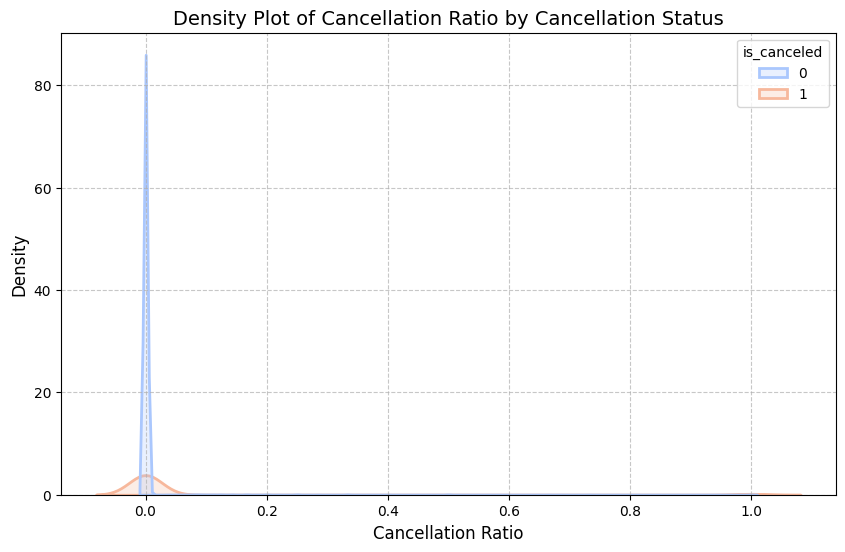

In [53]:
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create the KDE plot with additional enhancements and hue parameter
sns.kdeplot(data=df, x='cancellation_ratio', hue='is_canceled', fill=True, palette='coolwarm', linewidth=2)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Set labels and title with more descriptive text
plt.xlabel('Cancellation Ratio', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Density Plot of Cancellation Ratio by Cancellation Status', fontsize=14)

# Show the plot
plt.show()

In [54]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'stay_category', 'all_children', 'continent',
       'room_type_match', 'total_bookings', 'cancellation_ratio'],
      dtype='object')

In [55]:
df['distribution_channel'].value_counts(normalize=True) * 100

distribution_channel
TA/TO        79.114742
Direct       14.862623
Corporate     5.809789
GDS           0.207125
Undefined     0.005722
Name: proportion, dtype: float64

In [56]:
df['market_segment'].value_counts(normalize=True) * 100

market_segment
Online TA        59.064849
Offline TA/TO    15.891380
Direct           13.507730
Groups            5.655303
Corporate         4.815362
Complementary     0.803323
Aviation          0.259764
Undefined         0.002289
Name: proportion, dtype: float64

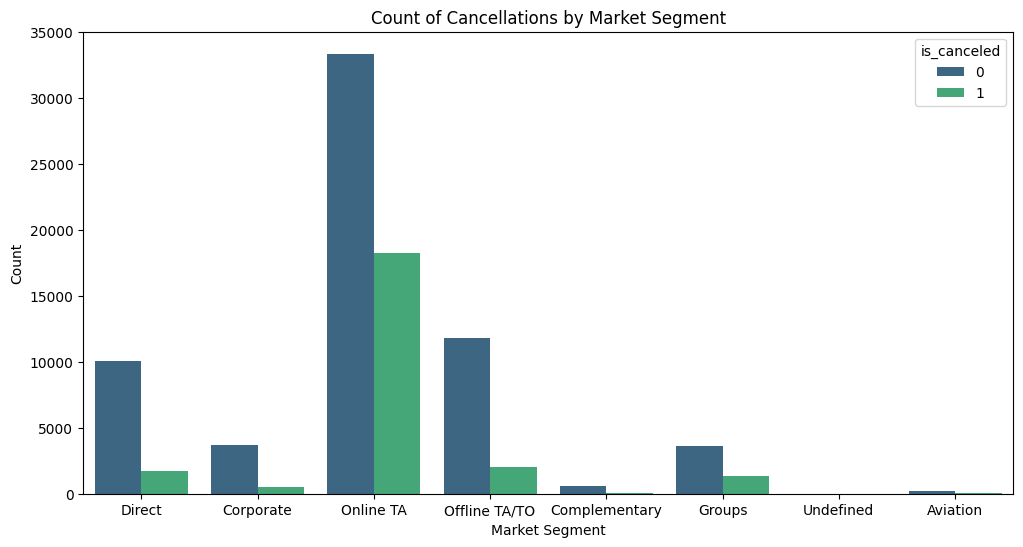

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.title('Count of Cancellations by Market Segment')

# Show the plot
plt.show()

Booking coming from Online TA and Offline TA/TO are more promising to not cancel the booking

In [58]:
# Calculate counts
counts = df.groupby(['distribution_channel', 'is_canceled']).size().unstack(fill_value=0)
counts['Total'] = counts.sum(axis=1)

# Calculate percentages
percentages = counts.div(counts['Total'], axis=0) * 100
percentages = percentages.drop(columns='Total')  # Drop total column from percentages

# Combine counts and percentages into one DataFrame
counts_and_percentages = counts.join(percentages, rsuffix='_percentage')
counts_and_percentages.columns = ['Not Canceled', 'Canceled', 'Total', 'Not Canceled %', 'Canceled %']

# Display the DataFrame
print(counts_and_percentages)

                      Not Canceled  Canceled  Total  Not Canceled %  \
distribution_channel                                                  
Corporate                     4429       648   5077       87.236557   
Direct                       11063      1925  12988       85.178626   
GDS                            145        36    181       80.110497   
TA/TO                        47726     21410  69136       69.032053   
Undefined                        1         4      5       20.000000   

                      Canceled %  
distribution_channel              
Corporate              12.763443  
Direct                 14.821374  
GDS                    19.889503  
TA/TO                  30.967947  
Undefined              80.000000  


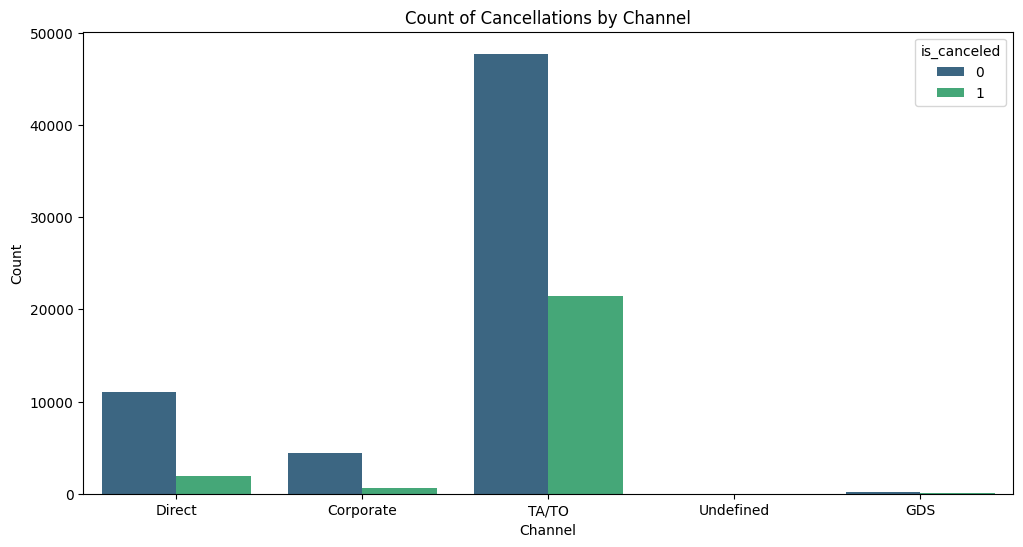

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(x='distribution_channel', hue='is_canceled', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Channel')
plt.ylabel('Count')
plt.title('Count of Cancellations by Channel')

# Show the plot
plt.show()

Direct and Corporate channels exhibit the most stable booking behavior with the highest percentages of non-cancellations.
TA/TO channel has the most bookings but also shows significant volatility with a high cancellation rate.
GDS channel shows reliable booking behavior similar to the direct and corporate channels.
Undefined channel has a very high cancellation rate, but this is based on a very small sample size.

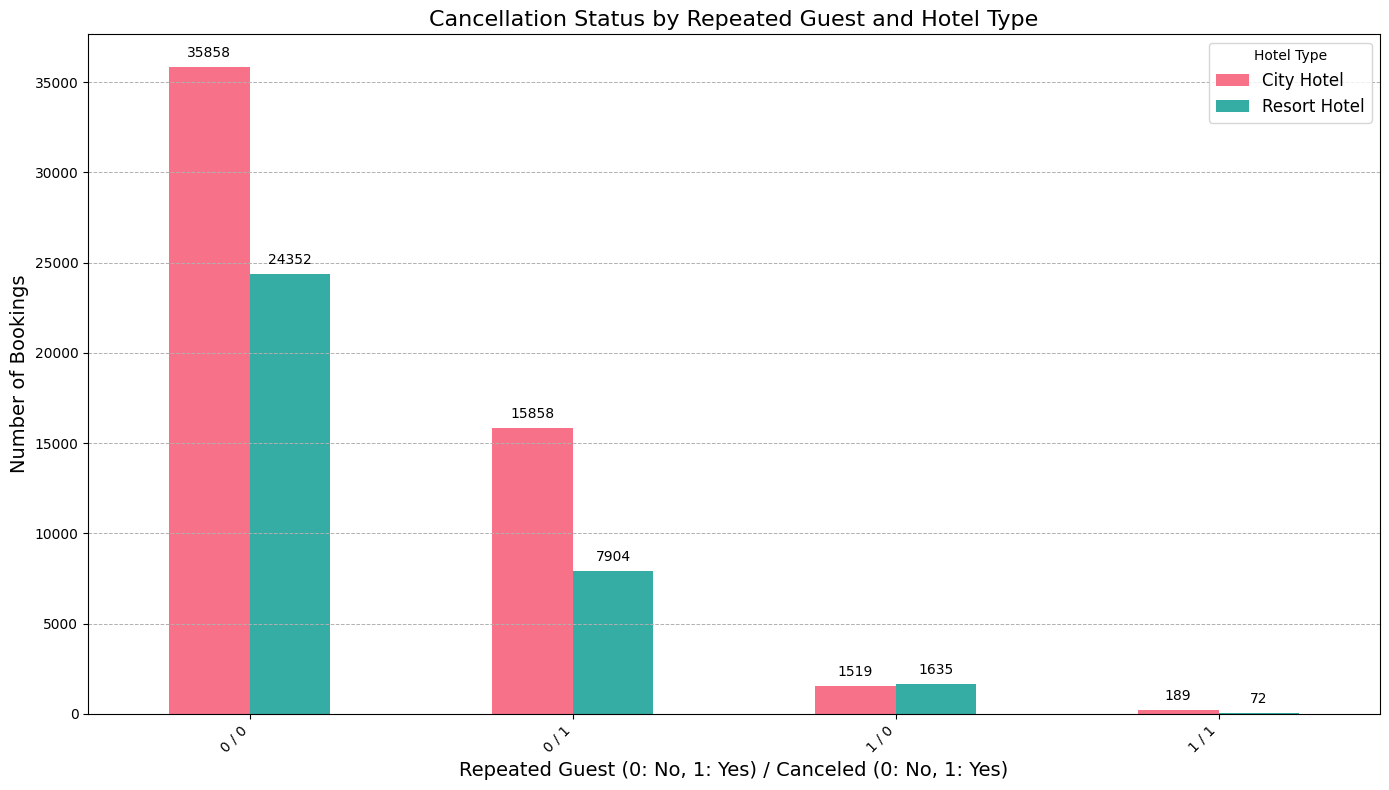

In [60]:
# Calculate the counts of cancellations by repeated guest status and hotel type
cancellation_counts = df.groupby(['is_repeated_guest', 'is_canceled', 'hotel']).size().unstack(fill_value=0)

# Plotting the clustered bar chart
fig, ax = plt.subplots(figsize=(14, 8))

cancellation_counts.plot(kind='bar', stacked=False, color=sns.color_palette("husl", len(cancellation_counts.columns)), ax=ax)

# Adding numbers on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than 0
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Customizing the plot
ax.set_title('Cancellation Status by Repeated Guest and Hotel Type', fontsize=16)
ax.set_xlabel('Repeated Guest (0: No, 1: Yes) / Canceled (0: No, 1: Yes)', fontsize=14)
ax.set_ylabel('Number of Bookings', fontsize=14)
ax.set_xticklabels([f'{int(a)} / {int(b)}' for a, b in cancellation_counts.index], rotation=45, ha='right')
ax.legend(title='Hotel Type', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

### Exploring Relation of repeated guest vs previous cancellations vs previous_bookings_not_canceled

                   previous_cancellations  previous_bookings_not_canceled
is_repeated_guest                                                        
0                                0.015053                        0.029819
1                                0.408199                        3.975403


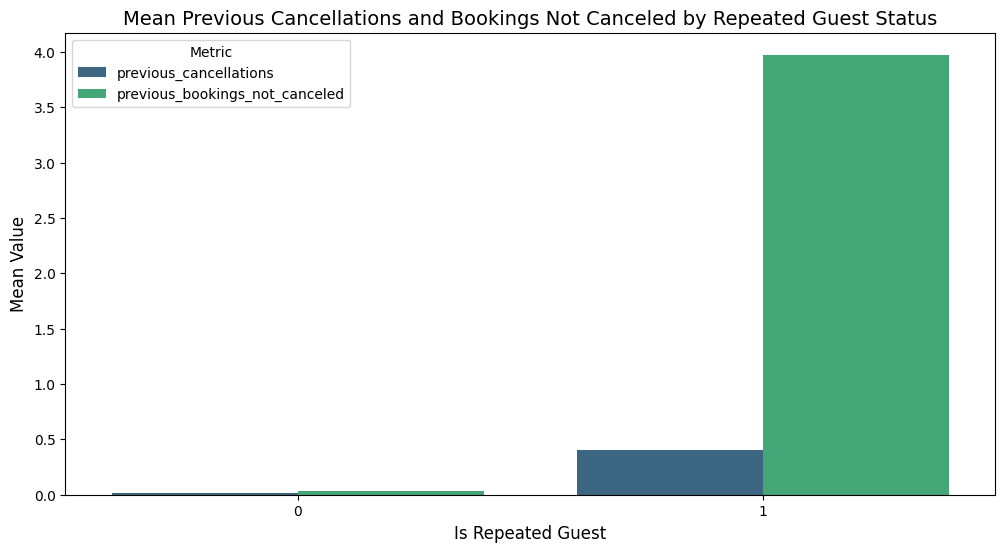

In [61]:
df1 = df[['is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled']]
# Group by is_repeated_guest and calculate mean values
grouped_df = df1.groupby('is_repeated_guest').mean()
print(grouped_df)

# Reset index for better plotting
grouped_df = grouped_df.reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=grouped_df.melt(id_vars='is_repeated_guest', var_name='Metric', value_name='Mean Value'),
            x='is_repeated_guest', y='Mean Value', hue='Metric', palette='viridis')

# Add titles and labels
plt.title('Mean Previous Cancellations and Bookings Not Canceled by Repeated Guest Status', fontsize=14)
plt.xlabel('Is Repeated Guest', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Metric')

# Show the plot
plt.show()

is_repeated_guest = 0 (Not a Repeated Guest)

previous_cancellations = 0.074503: On average, guests who are not repeated guests have very few previous cancellations. This suggests that most of these guests either haven't canceled many bookings or haven't had many bookings at all.
previous_bookings_not_canceled = 0.023438: On average, these guests have an extremely low number of previous bookings that were not canceled. This indicates that they rarely complete bookings or they are relatively new customers with few interactions.

is_repeated_guest = 1 (Repeated Guest)

previous_cancellations = 0.469816: On average, repeated guests have a higher number of previous cancellations compared to non-repeated guests. However, this number is still less than 1, indicating that while cancellations occur, they are not extremely frequent.
previous_bookings_not_canceled = 3.585039: Repeated guests have significantly more previous bookings that were not canceled. This high average indicates that these guests frequently complete their bookings, showing a pattern of loyalty and satisfaction with their bookings.

##Implications

Customer Loyalty: Repeated guests (indicated by is_repeated_guest = 1) tend to have more completed bookings (previous_bookings_not_canceled) and a somewhat higher but still manageable number of cancellations (previous_cancellations). This suggests that these guests are generally satisfied with their experience, despite occasional cancellations, and are likely to return.

Customer Behavior: Non-repeated guests (is_repeated_guest = 0) have very few completed bookings and cancellations, indicating they may be new or infrequent customers. They either have had limited interactions with the service or might not have found enough value to return.

Targeting Strategies: Efforts to reduce cancellations might be more effective if focused on repeated guests, as they have more interactions and a higher likelihood of returning. Conversely, strategies to convert non-repeated guests into repeated ones should focus on improving their initial experience to encourage more bookings and fewer cancellations.

##Conclusion
The data indicates that repeated guests exhibit more engagement and loyalty, as evidenced by their higher number of completed bookings. Despite having some cancellations, their overall behavior shows a trend towards returning and completing bookings more frequently than non-repeated guests. Understanding these patterns can help in designing targeted marketing and customer service strategies to enhance customer retention and satisfaction.

/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_2312/2365092319.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adr_by_month = df.groupby('arrival_date_month')['adr'].mean().reset_index()
/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_2312/2365092319.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=adr_by_month, x='arrival_date_month', y='adr', palette='Blues_d')


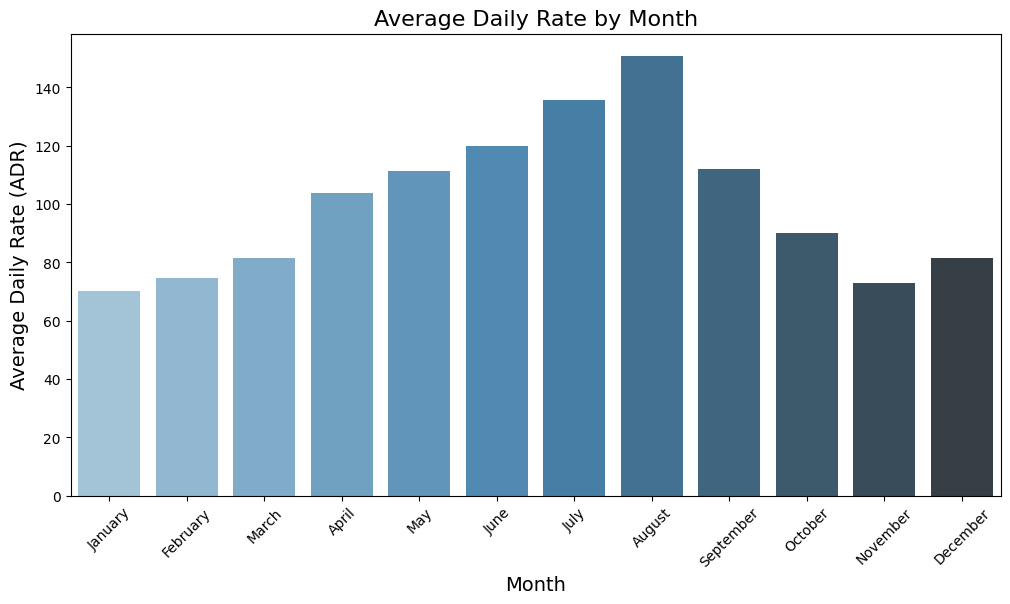

In [62]:
# Ensure the arrival_date_month column is in a proper categorical order
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],
                                          categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                      'July', 'August', 'September', 'October', 'November', 'December'],
                                          ordered=True)

# Calculate the average ADR for each month
adr_by_month = df.groupby('arrival_date_month')['adr'].mean().reset_index()

# Plot the ADR by month
plt.figure(figsize=(12, 6))
sns.barplot(data=adr_by_month, x='arrival_date_month', y='adr', palette='Blues_d')
plt.title('Average Daily Rate by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Daily Rate (ADR)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_2312/2748416854.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = df.groupby('arrival_date_month').agg({'adr': 'mean', 'is_canceled': 'sum'}).reset_index()


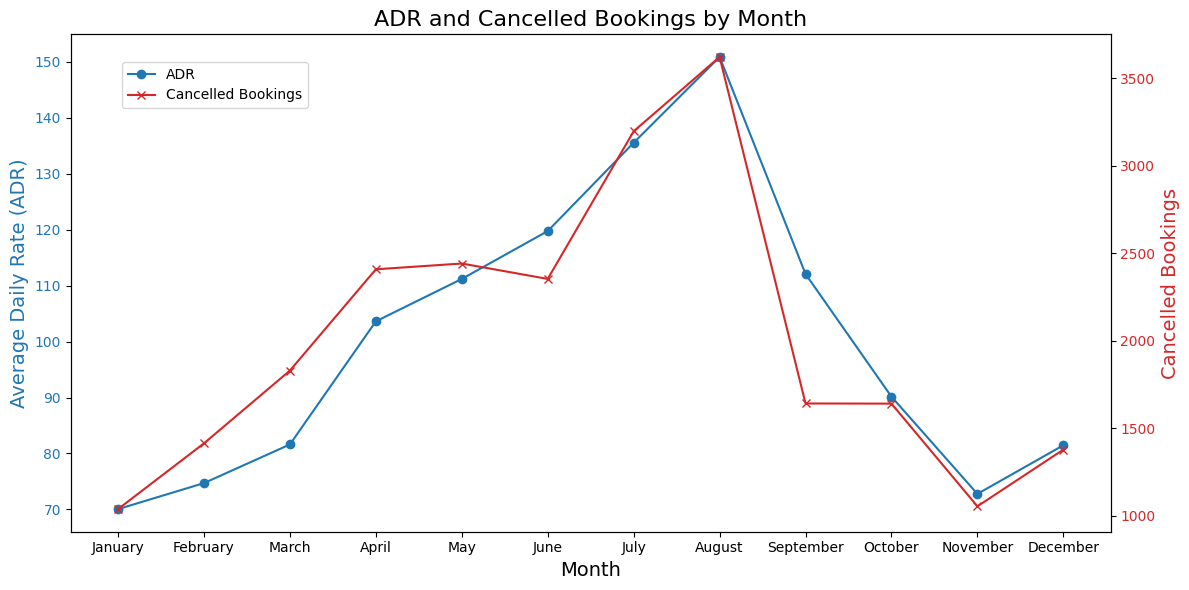

In [63]:
# Ensure the arrival_date_month column is in a proper categorical order
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],
                                          categories=['January', 'February', 'March', 'April', 'May', 'June',
                                                      'July', 'August', 'September', 'October', 'November', 'December'],
                                          ordered=True)

# Calculate the average ADR and number of cancellations for each month
monthly_data = df.groupby('arrival_date_month').agg({'adr': 'mean', 'is_canceled': 'sum'}).reset_index()

# Plotting the line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot ADR
ax1.set_title('ADR and Cancelled Bookings by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Average Daily Rate (ADR)', fontsize=14, color='tab:blue')
ax1.plot(monthly_data['arrival_date_month'], monthly_data['adr'], color='tab:blue', label='ADR', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot cancelled bookings
ax2 = ax1.twinx()
ax2.set_ylabel('Cancelled Bookings', fontsize=14, color='tab:red')
ax2.plot(monthly_data['arrival_date_month'], monthly_data['is_canceled'], color='tab:red', label='Cancelled Bookings', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
# Remove redundant property columns
df.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies', 'country', 'reserved_room_type',
                 'assigned_room_type', 'previous_cancellations', 'previous_bookings_not_canceled', 'previous_cancellations'], inplace=True)

In [65]:
# Separation of independent and target variables
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Normalization of numerical features using normalizers
numeric_features = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
                    'booking_changes', 'days_in_waiting_list',
                    'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_bookings',
                    'cancellation_ratio']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [67]:
from sklearn.preprocessing import OneHotEncoder

# Unique heat coding of categorical variables to make them acceptable parameters for models
categorical_features = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
                        'distribution_channel',
                        'deposit_type', 'customer_type', 'continent', 'stay_category']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [68]:
from sklearn.compose import ColumnTransformer

# Construct a data preprocessing pipeline that integrates numerical and categorical variables of the
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Define four classification models and their hyperparameter sets
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'classifier__C': [0.1, 1, 10, 100]
    }),
    'KNN': (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'classifier__max_depth': [5, 10, 15, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    })
}

In [70]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Introduction of classification model evaluation indicators
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

In [71]:
# Define results to store model-related information, such as model score, model runtime, etc.
results = {'Model': [], 'Metric': [], 'Score': [], 'Std': [], 'Time': []}
best_model = None
best_f1_score = 0
best_model_name = ""

In [72]:
import time
from sklearn.model_selection import GridSearchCV, cross_validate

# Iterate the model defined above, first use grid search to get its best parameters, then get the overall performance evaluation of the model by fivefold cross-validation, and also record the time taken by the model to save the best model and its parameters based on the F1 score
for name, (model, params) in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='f1', n_jobs=-1)

    start_time = time.time()
    grid_search.fit(X, y)
    end_time = time.time()

    elapsed_time = end_time - start_time
    best_estimator = grid_search.best_estimator_
    scores = cross_validate(best_estimator, X, y, cv=5, scoring=scoring, n_jobs=-1)

    results['Model'].extend([name] * 4)
    results['Metric'].extend(['Accuracy', 'Precision', 'Recall', 'F1'])
    results['Score'].extend([scores['test_accuracy'].mean(), scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_f1'].mean()])
    results['Std'].extend([scores['test_accuracy'].std(), scores['test_precision'].std(), scores['test_recall'].std(), scores['test_f1'].std()])
    results['Time'].extend([elapsed_time] * 4)

    print(f'{name} Best Params: {grid_search.best_params_}')
    print(f'{name} Test Accuracy: {scores["test_accuracy"].mean():.4f} ± {scores["test_accuracy"].std():.4f}')
    print(f'{name} Test Precision: {scores["test_precision"].mean():.4f} ± {scores["test_precision"].std():.4f}')
    print(f'{name} Test Recall: {scores["test_recall"].mean():.4f} ± {scores["test_recall"].std():.4f}')
    print(f'{name} Test F1: {scores["test_f1"].mean():.4f} ± {scores["test_f1"].std():.4f}')
    print(f'{name} Time taken: {elapsed_time:.2f} seconds')

    if scores['test_f1'].mean() > best_f1_score:
        best_f1_score = scores['test_f1'].mean()
        best_model = best_estimator
        best_model_name = name

Logistic Regression Best Params: {'classifier__C': 0.1}
Logistic Regression Test Accuracy: 0.7017 ± 0.0486
Logistic Regression Test Precision: 0.5444 ± 0.1836
Logistic Regression Test Recall: 0.3597 ± 0.2470
Logistic Regression Test F1: 0.3551 ± 0.1339
Logistic Regression Time taken: 15.11 seconds
KNN Best Params: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
KNN Test Accuracy: 0.5011 ± 0.1260
KNN Test Precision: 0.2540 ± 0.1342
KNN Test Recall: 0.3037 ± 0.2187
KNN Test F1: 0.2303 ± 0.1086
KNN Time taken: 706.24 seconds
Decision Tree Best Params: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}
Decision Tree Test Accuracy: 0.7203 ± 0.1228
Decision Tree Test Precision: 0.6112 ± 0.1796
Decision Tree Test Recall: 0.4207 ± 0.1975
Decision Tree Test F1: 0.4465 ± 0.1205
Decision Tree Time taken: 16.47 seconds


/Users/abhinavig/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest Best Params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Random Forest Test Accuracy: 0.6594 ± 0.0837
Random Forest Test Precision: 0.4272 ± 0.1740
Random Forest Test Recall: 0.2585 ± 0.2637
Random Forest Test F1: 0.2379 ± 0.1450
Random Forest Time taken: 969.26 seconds


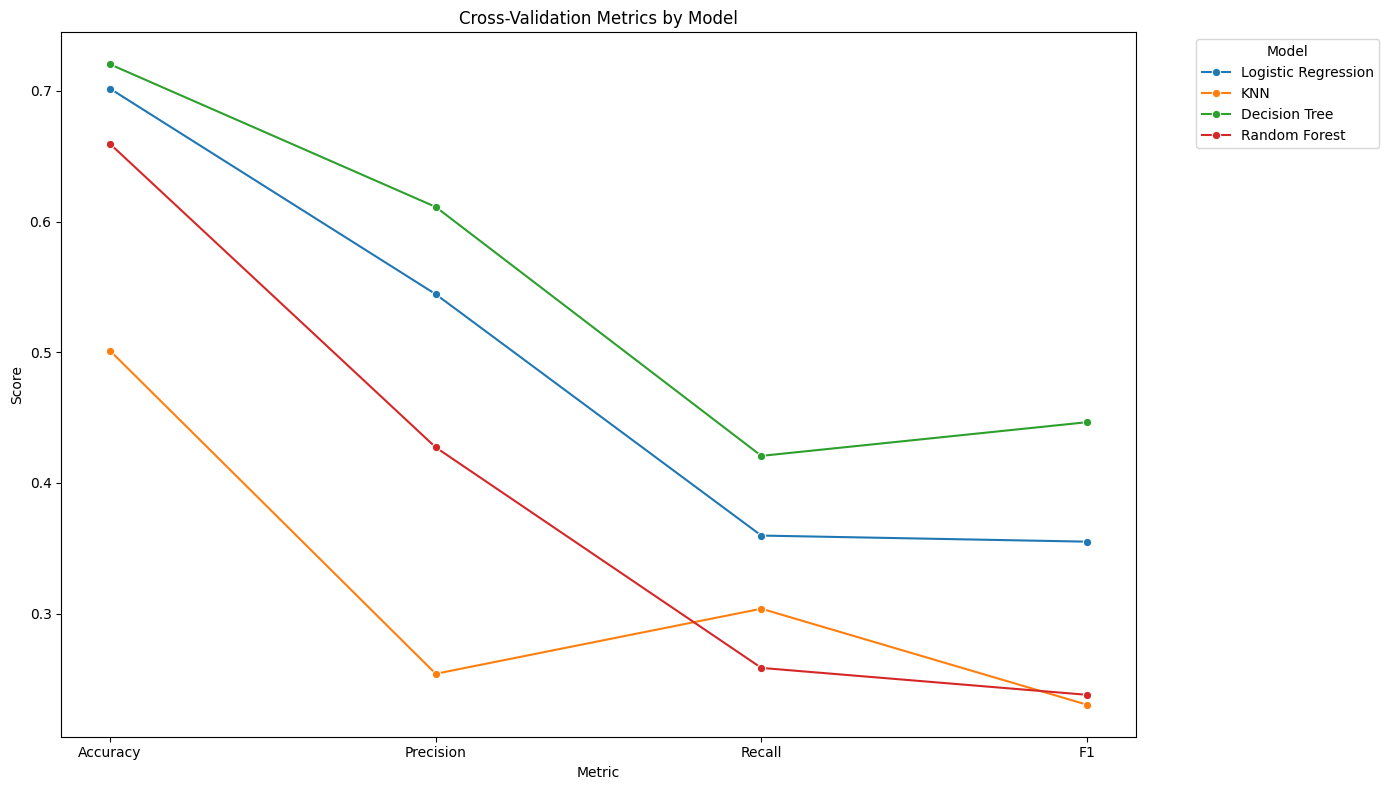

In [73]:
# Plotting different metrics under the optimal parameters of each model
results_df = pd.DataFrame(results)
plt.figure(figsize=(14, 8))
sns.lineplot(x='Metric', y='Score', hue='Model', data=results_df, marker='o')
plt.title('Cross-Validation Metrics by Model')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Based on the analysis of the graph and the table, the Decision Tree model stands out as the most suitable for this task, striking a balance between accuracy, precision, recall, and F1 score. Despite the Random Forest model achieving the highest scores in most metrics, the Decision Tree's interpretability and competitive performance make it a preferred choice. Using the optimal Decision Tree model, the confusion matrix and the ROC AUC curve below were generated to further evaluate its effectiveness.

In [74]:
# Print the time required to run each model and  the best model based on F1.
time_results = results_df[['Model', 'Time']].drop_duplicates().reset_index(drop=True)
print("\nModel Training Times:")
print(time_results)
print(f"\nBest Model: {best_model_name} with F1 Score: {best_f1_score:.4f}")


Model Training Times:
                 Model        Time
0  Logistic Regression   15.105752
1                  KNN  706.242335
2        Decision Tree   16.472550
3        Random Forest  969.261302

Best Model: Decision Tree with F1 Score: 0.4465


In [75]:
from sklearn.model_selection import train_test_split

# Fit the data using the selected best performing model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

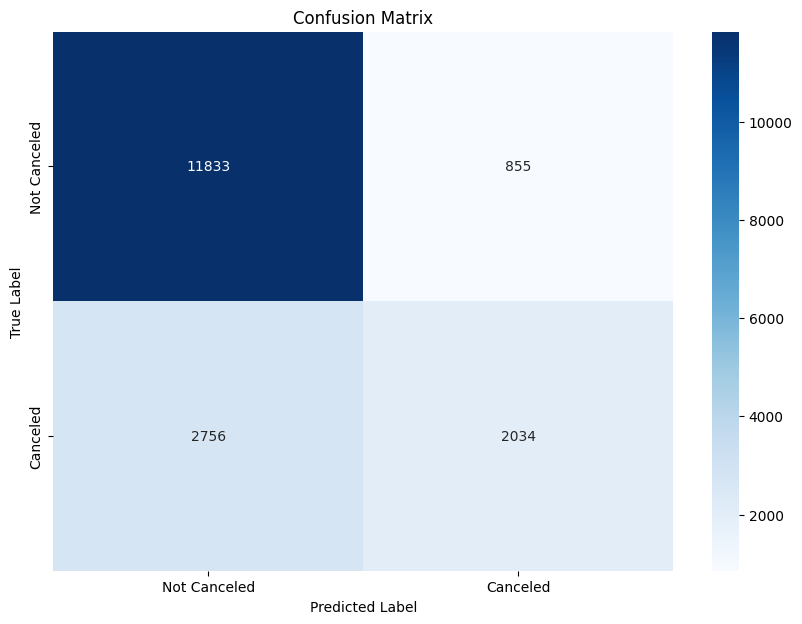

In [76]:
from sklearn.metrics import confusion_matrix

# Mapping the optimal model confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix shows that the Decision Tree model correctly predicted 11,811 instances as 'Not Canceled' and 2,034 instances as 'Canceled'. However, it misclassified 876 'Not Canceled' instances as 'Canceled' and 2,757 'Canceled' instances as 'Not Canceled'. This indicates that while the model performs well in identifying 'Not Canceled' instances, there is a notable number of false negatives where canceled bookings were not correctly identified.

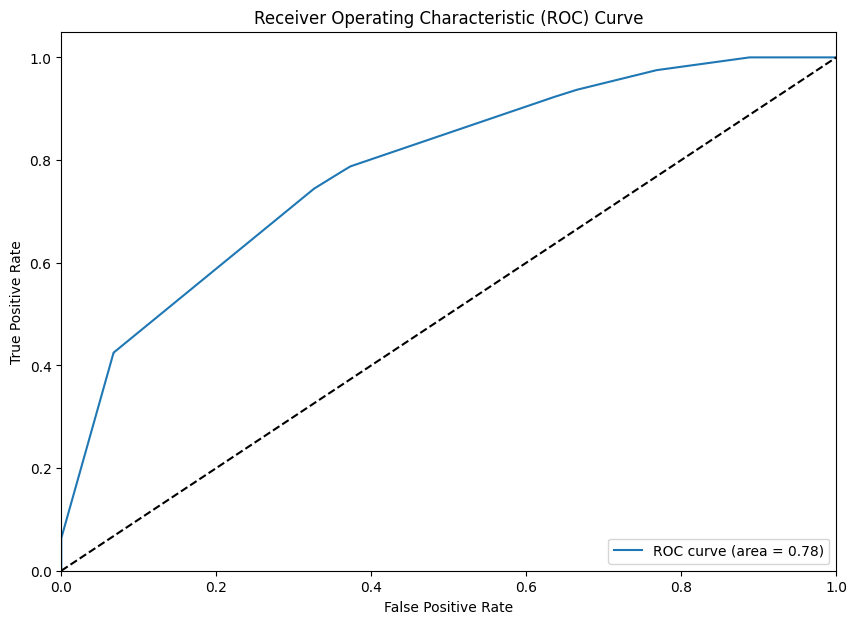

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plotting optimal model roc curves and calculating auc
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
auc = roc_auc_score(y_test, y_proba[:, 1])
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve illustrates the performance of the Decision Tree model in distinguishing between the 'Canceled' and 'Not Canceled' classes. With an AUC (Area Under the Curve) of 0.78, the model demonstrates a good ability to differentiate between the two classes. An AUC of 0.78 indicates that there is a 78% chance that the model will correctly distinguish between a randomly chosen 'Canceled' booking and a 'Not Canceled' booking, showing a reasonable balance between sensitivity and specificity.

### Conclusion

The analysis of hotel booking data reveal several key insights that can help improve customer retention and reduce cancellation rates. The main findings include:
* Booking Patterns: City Hotels have a higher booking volume compared to Resort Hotels. However, City Hotels also experience a higher cancellation rate (30%) compared to Resort Hotels (23.5%).
* The majority of bookings (72.5%) are not canceled, indicating a significant portion of customers follow through with their reservations.
* Customer types: Most guests are not repeated guests, with non-repeated guests showing minimal previous activity. This suggests a need for improved customer retention strategies.
* Repeated guests have significantly lower cancellation rates, indicating greater reliability and commitment. This emphasizes the importance of loyalty programs and personalized services.
* Market Segments: The Online Travel Agency (TA) segment has the highest volume of bookings but also the highest number of cancellations, suggesting it is less stable compared to Direct and Offline TA/TO segments.
* Encouraging direct bookings through loyalty programs or special offers could help increase booking stability and reduce dependency on third-party channels.
* Meal Plans: Bed & Breakfast (BB) is the most popular meal type but also has a relatively high cancellation rate (26.5%).
* Offering flexible booking options or improved cancellation policies could help reduce cancellation rates across all meal types.
* Lead Time and Seasonality: Both City Hotels and Resort Hotels show a peak in bookings with shorter lead times, indicating most bookings are made close to the stay date.
* There is a clear seasonality effect on the Average Daily Rate (ADR), with higher rates during summer months and lower rates during winter months
* Deposit Policies: The majority of cancellations occur when no deposit is required, suggesting that guests are more likely to cancel bookings without a financial commitment.
* Introducing a small refundable deposit could potentially decrease the number of cancellations while providing flexibility to guests

Non-linear relationships were identified between hotel information such as hotel type, room type, and services for predictive modeling of booking cancellations. At the same time, the imbalance of booking behavior in different months and years is detected, and the pattern of bookings and cancellations is understood. Strategies to mitigate risks through targeted marketing and pricing strategies are formed based on these insights. Overall, booking behavior is consistent with market conditions and seasonal changes. It is recommended to establish effective policies based on these predictions, and customer cancellation rates are expected to decline further.
In the study of predicting booking cancellations, several models were explored, including logistic regression, K-nearest neighbors, random forests, and decision trees, and each model was evaluated based on performance indicators such as accuracy, precision, recall, and F1 score. Ultimately, the decision tree model was selected as the preferred method for predicting booking cancellations, mainly due to its effectiveness in predicting the two-class model pattern. The final decision is found by finding the purity of layer-by-layer analysis. At the same time, it has better interpretability and robustness to overfitting, demonstrating its excellent ability to efficiently process categorical data and provide accurate and reliable predictions.
By leveraging these findings and implementing recommended models, hotels may minimize cancellations and make new price policies and service recommendations based on customer preferences, thereby attracting more customers to make repeat purchases and thus maintaining stability in the hotel industry.
